# A/B Testing Analysis with Synthetic Data

## Step 1: Import Libraries and Create Synthetic Dataset

In [5]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic data
control_data = pd.read_csv('contt.csv')
variant_data = pd.read_csv('testt.csv')
variant_data.head()

,user_id,group,converted
0,1001,variant,0
1,1002,variant,0
2,1003,variant,1
3,1004,variant,0
4,1005,variant,0


In [7]:
df = pd.concat([control_data, variant_data], ignore_index=True)
df.head()

,user_id,group,converted
0,1,control,0
1,2,control,1
2,3,control,0
3,4,control,0
4,5,control,0


## Step 2: Summary Statistics

In [9]:
summary = df.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
summary.columns = ['Total Users', 'Total Conversions', 'Conversion Rate']
summary

,Total Users,Total Conversions,Conversion Rate
group,,,
control,1000,124,0.124
variant,1000,152,0.152


## Step 3: Perform Z-Test for Proportions

In [11]:
successes = [summary.loc['control', 'Total Conversions'], summary.loc['variant', 'Total Conversions']]
n_obs = [summary.loc['control', 'Total Users'], summary.loc['variant', 'Total Users']]
z_stat, p_val = proportions_ztest(successes, n_obs)
print('successes:',successes)
print('n_obs:',n_obs)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

successes: [124, 152]
n_obs: [1000, 1000]
Z-statistic: -1.8153
P-value: 0.0695


## Step 4: Compute Confidence Intervals

In [13]:
ci_control = proportion_confint(successes[0], n_obs[0], method='normal')
ci_variant = proportion_confint(successes[1], n_obs[1], method='normal')
print(f"Control 95% CI: {ci_control}")
print(f"Variant 95% CI: {ci_variant}")

Control 95% CI: (0.10357269907846171, 0.14442730092153827)
Variant 95% CI: (0.12974806354152094, 0.17425193645847906)


## Step 5: Visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_13952\645473337.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='group', y='converted', ci=95)


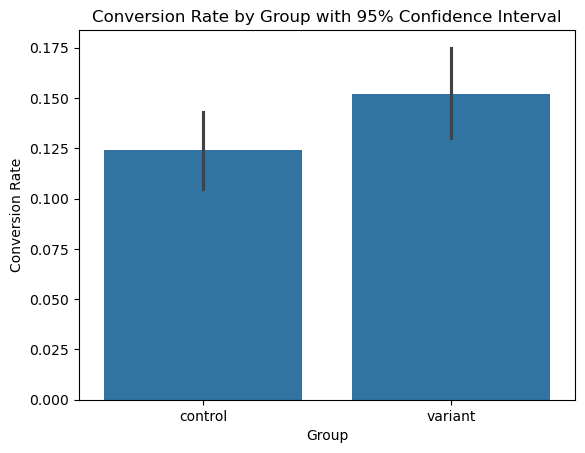

In [15]:
sns.barplot(data=df, x='group', y='converted', ci=95)
plt.title("Conversion Rate by Group with 95% Confidence Interval")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

## Step 6: Conclusion

In [17]:
if p_val < 0.05:
    print("✅ Statistically significant difference. Recommend implementing the change.")
else:
    print("❌ No statistically significant difference. Keep current version.")

❌ No statistically significant difference. Keep current version.
